# 

# Linear Algebra for Electrical Systems
## 2021-fall (430.216, Instructor: prof. Young Min Kim)
## TAs: Cheol-Hui Min and Junho Lee

## HW3: Gram-Schmidt, QR factorization, and matrix pseudo-inverse

---

- In this homework, you will be asked to implement and solve Gram-Schmidt algorithm, QR factorization method, and matrix
pseudo inverse.
algorithm using some basic linear algebraic operations using [Numpy](https://numpy.org/doc/stable/reference/) library.


- The goal of this HW is to get familiar with basic linear algebraic operations we learned so far for this course. Thus, 
you have to focus on finding appropriate Numpy operations and combining them to implement the mathematical logic of *K-means ++*.  

- This HW consists of 3 problems.
    - Problem 1. Visualizing Gram-Schmidt algorithm
    - Problem 2. QR factorization based on Gram-Schmidt algorithm
    - Problem 3. matrix pseudo-inverse via back substitution
 
- Please fill out all the `Problem #K. fill out here.` annotated parts.

- You should **NOT** use methods under `np.linalg` API. Please use generic `numpy` methods.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sympy as sy
sy.init_printing()

## Problem 1. Implementing and Visualizing Gram-Schmidt Algorithm
---
The  Gram-Schmidt algorithm is an algorithm of producing an orthogonal or orthonormal basis.


First we plot the $W=\operatorname{Span}\left\{\mathbf{a}_{1}, \mathbf{a}_{2},\mathbf{a}_{3}\right\}$.

<Figure size 432x288 with 0 Axes>

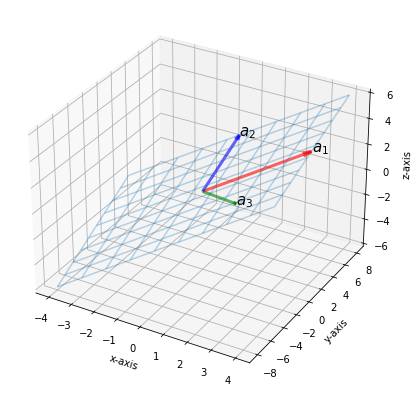

In [3]:
plt.clf()
######################## Subspace W ##############################
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

# define our vectors
vec = np.array([[[0, 0, 0, 3, 6, 2]],
                [[0, 0, 0, 1, 2, 4]],
                [[0, 0, 0, 2, -2, 1]]])

X = vec[0,:,3] * S + vec[1,:,3] * T
Y = vec[0,:,4] * S + vec[1,:,4] * T
Z = vec[0,:,5] * S + vec[1,:,5] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1 and x2 ##############################
colors = ['r','b','g']
s = ['$a_1$', '$a_2$', '$a_3$']
for i in range(vec.shape[0]):
    X,Y,Z,U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False,
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(vec[i,:,3][0], vec[i,:,4][0], vec[i,:,5][0], s = s[i], size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

<!-- If we choose $\mathbf{\tilde{q}}_1= \mathbf{a}_1$, then the orthogonal component of projection of $\mathbf{a}_2$ onto $\mathbf{\tilde{q}}_1$ is $\mathbf{\tilde{q}}_2$.


Define the projecttion of vector $\mathbf{a}_2$ on the vector $\mathbf{\tilde{q}}_1$ as $\text{Proj}_{\mathbf{\tilde{q}}_1}\mathbf{a}_2 = \alpha \mathbf{a}_1$, 

 then $(\mathbf{a}_2 - \alpha \mathbf{a}_1)\cdot \mathbf{a}_1 = 0$, rearange for $\alpha$

$$
\alpha = \frac{\mathbf{a}_2^T\mathbf{a}_1}{\mathbf{a}_1^T\mathbf{a}_1}
$$

According to definition above

$$
\text{Proj}_{\mathbf{\tilde{q}}_1}\mathbf{a}_2 = \alpha \mathbf{a}_1 = \frac{\mathbf{a}_2^T\mathbf{a}_1}{\mathbf{a}_1^T\mathbf{a}_1}\mathbf{a}_1
$$

The orthogonal component, $\mathbf{\tilde{q}}_2$ is 

$$
\mathbf{a}_2- \text{Proj}_{\mathbf{\tilde{q}}_1}\mathbf{a}_2 =\mathbf{a}_2 - \frac{\mathbf{a}_2^T\mathbf{a}_1}{\mathbf{a}_1^T\mathbf{a}_1}\mathbf{a}_1
$$ -->

We first apply the Gram-Schmidt line by line to the example above. Please refer to the figure of Gram-Schmidt algorithm in our lecture note.

In [7]:

# define norm 
def norm(v):
    """
        Compute the 2-norm of given vector.
        Input:
            a batch of vector of shape [N, D] 
        Return:
            a batch of computed 2-norm of shape [N, D]
    """
    # Assume we use Frobenious norm (Euclidean norm)
    return np.sqrt(np.sum(v**2, axis=-1))

# our vectors that span the 3D space.
a1 = np.array([3, 6, 2])
a2 = np.array([1, 2, 4])
a3 = np.array([2, -2, 1])

# set the a1 as the q_tilde_1
q_tilde1 = # Problem #1. fill out here

# normalize q_1
q1 = # Problem #1. fill out here

# yield q_tilde2 that is orthogonal to q_1
q_tilde2 = # Problem #1. fill out here

# normalize q_2
q2 =# Problem #1. fill out here

# yield q_tilde3 that is orthogonal to q_1 and q_2
q_tilde3 = # Problem #1. fill out here

# normalize q_3
q3 = # Problem #1. fill out here

Now, let's see if the orthogonalization worked.

<Figure size 432x288 with 0 Axes>

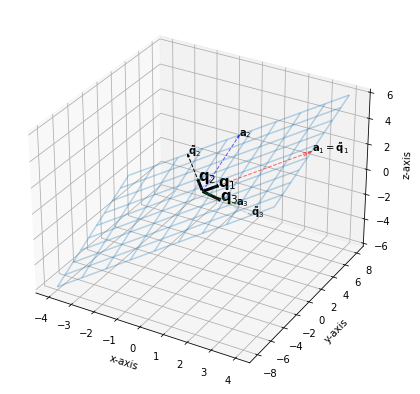

In [8]:
plt.clf()
######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

a1, q_tilde1 = np.array([3, 6, 2]), np.array([3, 6, 2])
a2 = np.array([1, 2, 4])
a3 = np.array([2, -2, 1])

X = a1[0] * S + a2[0] * T
Y = a1[1] * S + a2[1] * T
Z = a1[2] * S + a2[2] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, a1[0], a1[1], a1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 1)

vec = np.array([[0, 0, 0, a2[0], a2[1], a2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 1)

vec = np.array([[0, 0, 0, a3[0], a3[1], a3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 1)

vec = np.array([[0, 0, 0, q1[0], q1[1], q1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1.0, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, q_tilde2[0], q_tilde2[1], q_tilde2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1.0, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 1)

vec = np.array([[0, 0, 0, q2[0], q2[1], q2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1.0, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 3)


vec = np.array([[0, 0, 0, q_tilde3[0], q_tilde3[1], q_tilde3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'gray', alpha = 0.3, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'dashed',linewidths = 1)

vec = np.array([[0, 0, 0, q3[0], q3[1], q3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1.0, arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(a1[0], a1[1], a1[2], '$\mathbf{a}_1 = \mathbf{\~{q}}_1 $', size = 10)
ax.text(a2[0], a2[1], a2[2], '$\mathbf{a}_2$', size = 10)
ax.text(a3[0], a3[1], a3[2], '$\mathbf{a}_3$', size = 10)
ax.text(q1[0], q1[1], q1[2], '$\mathbf{q}_1$', size = 15)

ax.text(q_tilde2[0], q_tilde2[1], q_tilde2[2], '$\mathbf{\~{q}}_2$', size = 10)
ax.text(q2[0], q2[1], q2[2], '$\mathbf{q}_2$', size = 15)

ax.text(q_tilde3[0], q_tilde3[1], q_tilde3[2], '$\mathbf{\~{q}}_3$', size = 10)
ax.text(q3[0], q3[1], q3[2], '$\mathbf{q}_3$', size = 15)


ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

Check if $\mathbf{q}_i,i=1,2,3$ are orthogonal to each other.

In [10]:
print(np.allclose(q1 @ q2, 0.))
print(np.allclose(q3 @ q2, 0.))
print(np.allclose(q3 @ q1, 0.))

True
True
True


Now let's construct our generalized form of the algorithm. The pseudo-code is provided in the pp.97 of our textbook.

In [11]:
# This implementation is based on Algorithm 5.1 of the textbook. (pp.97)
def gram_schmidt(a):
    """
    in: a - length k list of n-dim np.arrays.
    out: q - length k list of n-dim orthonormal np.arrays. 
    """
    q = []
    # orthogonalization
    for i in range(len(a)): # for i = 1, ..., k
        q_tilde = a[i]
        for j in range(len(q)): # for each dimension of q_tilde
            # recursively add the 
            q_tilde = # Problem #1. Eq.1 of Algorithm 5.1 in textbook
        # Test for linear dependence. If \tilde{q}_i = 0.
        if # Problem #1. fill out here:
            print('Vectors are linearly dependent.')
            print('GS algorithm terminates at iteration ', i+1)
            return q
        #Normalization Eq.3 of Algorithm 5.1 in textbook
        else:
            q_tilde = # Problem #1. fill out here
            q.append(q_tilde)
    return q

# let's test the algorithm
a = np.vstack([a1, a2, a3])
q = gram_schmidt(a)
print(q)
#Test orthonormality
print('Norm of q[0] :', (sum(q[0]**2))**0.5)
print('Inner product of q[0] and q[1] :', q[0] @ q[1])
print('Inner product of q[0] and q[2] :', q[0] @ q[2])
print('Norm of q[1] :', (sum(q[1]**2))**0.5)
print('Inner product of q[1] and q[2] :', q[1] @ q[2])
print('Norm of q[2] :', (sum(q[2]**2))**0.5)

[array([0.42857143, 0.85714286, 0.28571429]), array([-0.12777531, -0.25555063,  0.95831485]), array([ 0.89442719, -0.4472136 ,  0.        ])]
Norm of q[0] : 0.9999999999999999
Inner product of q[0] and q[1] : 2.220446049250313e-16
Inner product of q[0] and q[2] : -1.1102230246251565e-16
Norm of q[1] : 1.0
Inner product of q[1] and q[2] : 4.163336342344337e-17
Norm of q[2] : 1.0


## Problem 2. QR factorization based on Gram-Schmidt algorithm

Now we implement the QR factorization method based on the Gram-Schmidt algorithm we implemented above.


In [17]:
def QR_factorization(A):
    """
    in: numpy array whose k columns are linearly independent.
    """
    # we feed gram_schmidt() A.T since it orthonormalizes row vectors of the input array. 
    # Thus, we get transposed array whose rows are orthonormal. 
    Q_transpose = np.array(# Problem #2. fill out here)
    R = # Problem #2. fill out here R_ij=q_i^T a_j
    Q = # Problem #2. fill out here
    return Q, R

Test your implementation of QR factorization.

In [18]:
# compare with numpy's native qr factorization
A = np.random.normal(size = (6,4))

Q, R = np.linalg.qr(A)

# check if A = QR
print(np.allclose(Q@R, A))

# check if Q.T Q = I
print(np.allclose(Q.T @ Q, np.eye(4)))

True
True


In [19]:
# check your implementation

# q - 6 X 4 matrix ; r - 4 X 4 matrix
q, r = QR_factorization(A)

# check if A = qr
print(np.allclose(q@r, A))
# check if q^T = q^-1 

print(np.allclose(q.T @ q , np.eye(4)))



True
True


## Problem 3. Matrix pseudo-inverse via QR factorization

Now we compute the inverse of a matrix and the pseudo-inverse for the non-square matrix using QR factorization. Please refer to Chapter 11.5 of our textbook.

$A^{\dagger}=R^{-1}Q^{\top}$


In [28]:


# define the back-substitution function.
# please refer to pp.207 of our textbook.
def back_subst(R, b_tilde):
    n = R.shape[0]
    x = np.zeros(n)
    for # Problem #3. fill out here: # iterate in reversed order: n, n-1, ..., 1.
        x[i] = # Problem #3. fill out here
        for j in range(i+1, n):
            x[i] = # Problem #3. fill out here. Numerator in Algorithm 11.1
        x[i] = # Problem #3. fill out here. Denominator in Algorithm 11.1
    return x

# define a solver the uses back_substituion.
def solve_via_backsub(A, b):

    # first to QR factorization
    Q, R = # Problem #3. fill out here
    # let b_tilde as Q^T b
    b_tilde = # Problem #3. fill out here

    # solve Rx=Q^Tb to get x.
    x = back_subst(# Problem #3. fill out here)
    return x



Now we compute inverse via QR factorization and back substituion. Please refer to pp.209 of our textbook.

In [42]:
# define a square matrix.
A = np.random.normal(size= (3, 3))

# for tdo QR factorize
Q, R = QR_factorization(A)

# iterate over the columns of Q.T.
n = Q.T.shape[1]
results = []
for i in range(n):
    result = solve_via_backsub(# Problem #3. fill out here) # iterate over columns of Q.T
    results.append(result)
# merge as a matrix by concatenating over columns
A_inv_via_QR = # Problem #3. fill out here

# compare with numpy's native inverse method.
A_inv = np.linalg.inv(A)
print(np.allclose(A_inv_via_QR, A_inv))

3
True


Now we test for the non-square matrix to implement the pseudo-inverse. Please refer to pp. 216 of our textbook.

In [47]:
A = np.array(
    [
        [-3, -4],
        [4, 6],
        [1, 1]
    ])


Q, R = np.linalg.qr(A)

# iterate over the columns of Q.T.
n = Q.T.shape[1]
results = []
for i in range(n):
    result = solve_via_backsub(# Problem #3. fill out here) # iterate over columns of Q.T
    results.append(result)
# merge as a matrix by concatenating over columns
A_pinv_via_QR = # Problem #3. fill out here

# compare with numpy's native inverse method.
np.linalg.pinv(A)

print(np.allclose(A_pinv_via_QR, A_pinv))



True
